# Praca z obrazkami w Pythonie

W niniejszym tutorialu pokażemy w jaki sposób pracować można z obrazkami w Pythonie. Podstawowym celem jaki sobie stawiamy jest wykorzystanie narzędzi Pythona do wczytania obrazka przez interpreter Pythona - wyświetlenie go oraz dokonanie rzutowania na wektor / macierz typu numpy.ndarray czyli na liczby. 

# Teoria komputerowych obrazów bitowych

Zanim jakieś konkrety dotyczące pracy z obrazami w Pythonie powiedzmy sobie kilka kluczowych słów dotyczących komputerowych obrazów - będzie to dla nas konieczne aby zrozumieć typy i rozmiary tworzonych przez nas danych.

Obrazy komputerowe można podzielić na dwie podstawowe grupy

* grafiki rastrowe
* grafiki wektorowe

O grafikach wektorowych mówimy, kiedy przedmioty znajdujące się na obrazie są opisane za pomocą matematycznych kształtów takich jak: punkty, proste, odcinki, trójkąty, kwadraty, sześciany, etc. W tym rodzaju grafiki przedstawiony obraz jest efektem obserwowania matematycznych kształtów z pewnego punktu przestrzeni nazywanego kamerą lub obserwatorem. Obrazy takie można łatwo przekształcać, dzielić na mniejsze części. Jeśli jednak scena zawiera bardzo dużo elementów - opis takiej grafiki potrafi osiągnąć bardzo znaczne rozmiary. Są one używane najczęściej do tworzenia planów architektonicznych, szkiców, dokumentacji technicznej.

Grafiki rastrowe stoją w kontrapunkcie do wektorowych. Charakteryzują się stałym rozmiarem i są niezwykle niepodatne na transformacje. W typie tym nie ma matematycznego wyszczególnienia obiektów znajdujących się na obrazie. Dane reprezentowane są tu w postaci tablicy pikseli, punktów reprezentowanych przez pojedynczy kolor. Jest to reprezentacja, w której wydajnie daje się składować grafiki i wysokim poziomie szczegółowości. Grafiki takie są wykorzystywane głównie w fotografii i kamerowaniu. 

## Uwaga - grafika komputerowa 

W grafice komputerowej najczęściej wykorzystuje się modele hybrydowe. Dla postaci tworzy się trójwymiarowy model grafiki wektorowej, następnie dla poszczególnych powierzchni(trójkątów - wielokątów) rozciąga się na nich płaski obraz rastrowy. Dodatkowo najczęściej oprócz postaci modelowej tworzy się również 2 wymiarowy płaski model, który wyświetla się w zastępstwie jeśli obserwujemy dalekie tło.

![Grafika mieszana w grach](https://i.ytimg.com/vi/coKFj27u1Lo/maxresdefault.jpg)

# Obrazy rastrowe

Dla potrzeb przetwarzania danych najczęściej wykorzystywane są obrazy rastrowe. Najczęściej właśnie w kontekście klasyfkowania, oznaczania obiektów na tych obrazach. (Na wektorowych nie było za specjalnie nic do roboty).

W obrazach takich podstawowym pojęciem jest piksel, opisujący kolor w danym położeniu. Dwa pierwsze wymiary dla obrazu jakie podaje się oficjalnie to ich wysokość i szerokość omawiająca ilość występujących tam pikseli. Dalej zaczyna być ciut trudniej. 

## Reprezentacja koloru

Jeśli piksel jest opisany przez pojedynczą liczbę to znaczy, że obraz jesty wyrażony jedynie z użyciem skali szarości. Jest to obraz tzw. monochromatyczny - czyli czarno-biały (głównie szary). Rozmiary takich obrazów to najczęście 

Width x Height

### Obrazy RGB i CMYK

Jeśli obraz jest kolorowy to jego reprezentowania potrzebne jest więcej niż jeden kanał. Ogólnie do reprezentowania dowolnego koloru potrzebne są 3 kanały (wymiary)

W reprezentacji RGB są to

* R - red - czerwony
* G - green - zielony
* B - blue - niebieski

Jest to standard wyświetlania kolorów wykorzystywany głównie z pracy monitorów komputerowych

W reprezentacji CMYK są to

* C - cyjan
* M - magenta
* Y - yellow - żółty
* K - suma wszystkich tych kolorów czyli czarny

Jest to standardowy rozkład kolorów na farby drukarskiej.

Oznacza to, że obrazy kolorowe będę miały rozmiar Height x Width x 3 jeśli są obrazami kolorowymi. Zmienne w trzecim wymiarze będą reprezentować odpowiedni kanał w zależności od reprezentacji w jakiej zostały zapisane (RGB lub CMYK).

### Kanał alpha

Oprócz tego w niektórych obrazach stosuje się jeszcze 4 kanał - nazywany kanałem Alpha - oznacza on przezroczystość danego piksela. Dla pojedynczego obrazu nie ma on za bardzo znaczenia - jednak kiedy zaczyna pracować się z grafikami i je składać, montować i wycinać - występowanie tego kanału nabiera wyraźniejszego sensu. 

Zatem są również obrazy reprezentowane przez tablice o rozmiarze Height x Width x 4, gdzie ostatni kanał to właśnie przezroczystość alpha

## Reprezentacja wartości

Oprócz ilości kanałów dla obrazka ważne jest również w jaki sposób zapisane są występujące poszczególne kolory. Mamy 3 reprezentacje

* tekstowa - w zapisie hexadecymalnym - służy do wygodnego dla ludzi sposobu zapisania koloru np. czerwony to #FF0000
* zmiennoprzecinkowa - float - opisujący w zakresie od 0 do 1 ile procento kanału zostało użyte
* całkowitoliczbowa - int - o różnych rozmiarach opisująca w zależności od typu wartości danego kanału w zakresie 0-255 lub 0-65535 lub nawet większym. Niezmienne jest, że wartość największa odpowiada pełni mocy danego kanału, a 0 jest pustce.

Dalej możemy już chyba przystąpić do czytania grafik rastrowych z użyciem Pythona

# Obrazy w Python

Do pracy z obrazami w Pythonie dostępne jest wiele bibliotek z których dwie wyróżniają się szczególną popularnością 

* pil - pillow, oraz
* openCV

Zaprezentujemy najprostsze przykłady z użyciem obu tych bibliotek, nie kusząc się o ich porównywanie.

## Pakiet PlL-pillow

Historycznie chodzi nam o popularny pakiet pil do obsługi obrazów PIL. Pakiet ten jednak nie jest już od dłuższego czasu rozwijany, grupa która go utworzyła rozeszła się po świecie. Grupa innych entuzjastów postawiła kontynuować pracę nad tym projektem tworząc jego fork o nazwie Pillow. Historia ta jest PIL! 

In [21]:
from PIL import Image

import requests
from io import BytesIO

kitten = 'https://www.koty.pl/wp-content/uploads/2017/11/shutterstock_330164483-864x575.jpg'
response = requests.get(kitten)
im = Image.open(BytesIO(response.content))

Do zaimportowania pliku z dysku wystarczy podać ścieżkę zamiast uchwytu do zasobu

```python
im = Image.open('sciezka/do/pliku')
```

Do wykonania jego rzutowania wystarczy wykonać

In [22]:
import numpy as np
array_image = np.asarray(im)
array_image

array([[[204, 163, 117],
        [204, 164, 115],
        [203, 163, 114],
        ...,
        [ 64,  28,   2],
        [ 63,  29,   2],
        [ 63,  29,   2]],

       [[202, 164, 117],
        [202, 164, 115],
        [201, 163, 114],
        ...,
        [ 64,  28,   2],
        [ 63,  29,   2],
        [ 63,  29,   2]],

       [[203, 165, 118],
        [202, 164, 115],
        [202, 164, 115],
        ...,
        [ 65,  28,   2],
        [ 64,  28,   2],
        [ 64,  28,   2]],

       ...,

       [[121,  79,  41],
        [121,  79,  41],
        [121,  79,  39],
        ...,
        [ 53,  22,   1],
        [ 53,  22,   1],
        [ 54,  22,   1]],

       [[118,  78,  42],
        [118,  78,  42],
        [117,  78,  39],
        ...,
        [ 53,  22,   1],
        [ 53,  22,   1],
        [ 54,  22,   1]],

       [[116,  78,  42],
        [116,  78,  41],
        [115,  77,  40],
        ...,
        [ 53,  22,   1],
        [ 53,  22,   1],
        [ 54,  22,   1]]

Jak widać bardzo prosto przeprowadzić taką konwersję. Widać również że jest to obraz kolorowy, ale bez kanału alpha. RGB lub CMYK i jest reprezentowany przez typ uint8 czyli 8 bitowy typ liczbowy bez znaku - czyli z zakresu 0-255. Z dużą dozą pewności można powiedzieć, że będzie to obraz RGB.

Dalej jego wyświetlenie w matplotlib

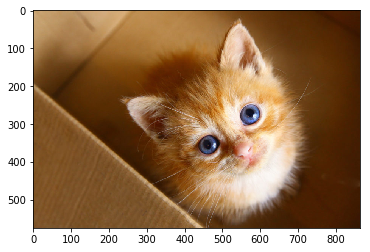

In [23]:
%matplotlib inline
from matplotlib.pyplot import imshow

imshow(array_image)


Ważna obserwacja jest poczyniana gdy patrzymy na osie. Punkt o współrzędnych x=0, y=0 to zawsze lewy górny róg. Jest to często zaskakujące gdyż na lekcjach matematyki przywykliśmy numerowować od lewego dolnego rogu.

Obraz ten możemy sobie teraz w pewnym zakresie przekształcać - np. usunąć kanał zieleni

In [24]:
H, W , channels = array_image.shape
print('H {} , W {} , C {}'.format(H, W, channels))

H 575 , W 864 , C 3


In [25]:
array_image.setflags(write=1)
for i in range(H):
    for j in range(W):
        array_image[i,j,2] = 0

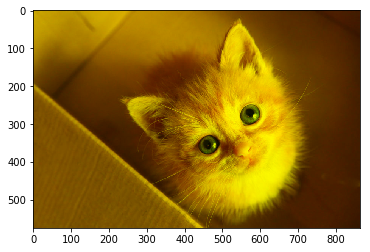

In [26]:
%matplotlib inline
imshow(array_image)

A po usunęciu czerwonego


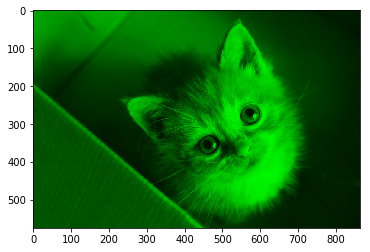

In [27]:
%matplotlib inline
for i in range(H):
    for j in range(W):
        array_image[i,j,0] = 0
imshow(array_image)

## Konwersja

Do odczytywania obrazów w zależności od ich typów służą specjalne zestawy flag

* 'L' (luminance) for greyscale images, 
* 'RGB' for true color images, and 
* 'CMYK' for pre-press images.

Ten sam parametr używa się również przy konwersji

In [28]:
im = Image.open(BytesIO(response.content)).convert('L')
greyscale = np.asarray(im)
greyscale

array([[170, 170, 169, ...,  35,  36,  36],
       [170, 169, 168, ...,  35,  36,  36],
       [171, 169, 169, ...,  36,  35,  35],
       ...,
       [ 87,  87,  86, ...,  28,  28,  29],
       [ 85,  85,  85, ...,  28,  28,  29],
       [ 85,  85,  84, ...,  28,  28,  29]], dtype=uint8)

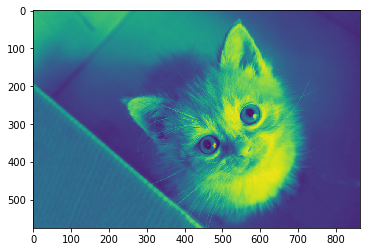

In [29]:
%matplotlib inline
imshow(greyscale)

## Pakiet OpenCV

cdn...